# Saint Michael's College - CS 415 Artificial Intelligence
## Logistic Regression and Decision Boundary
### Iris Data Set

Submissions should be in `ipynb` format (modifying this document) and should run on Chrome, Safari, or Firefox. These are the browsers that are officially supported by Jupyter. Your notebook should be named

\[your last name\]_\[your first name\]_iris.ipynb

_e.g._, west_kanye_iris.ipynb.

While PEP-8 should always be the default for writing Python code, it is quite common in the world of machine learning to use upper case, single letter variable names for matrices and vectors, _e.g._, X, Y, Z. We will use this convention with the understanding that we are deviating from PEP-8 for very specific, and well-defined reasons. Other deviations from PEP-8 are discouraged.

**Please leave Markdown cells intact in your submissions.** Thanks.
<br />

### Rubric:

| task                                          | points |
|:----------------------------------------------|-------:|
| visualizing data                              |      3 |
| preparing data                                |      2 |
| vectorized sigmoid function                   |      3 |
| vectorized cost function                      |      5 |
| vectorized gradient function                  |      3 |
| implement gradient descent                    |      5 |
| train model                                   |      5 |
| implement prediction probability function     |      3 |
| make prediction                               |      3 |
| write function to calculate decision boundary |      3 |
| plot the decision boundary                    |      5 |
| TOTAL                                         |     40 |

#### Due: Tuesday, 2022-03-29 11:59 PM

_Note on equations and formulae_: Current versions of Jupyter Notebook have MathJax support built in for rendering equations using LaTeX. If for any reason, you do not see equations and formulae properly rendered in this document, please contact me right away, and let me know the version of Jupyter you are using. Thanks.

In [576]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We use the matplotlib inline backend so that the output of plots is displayed inline within the Jupyter notebook (and not creating new windows or files). This is accomplished with the following directive:
%matplotlib inline

## Introduction

The iris is a common flower in many temperate zone flower gardens. In this exercise, you will implement logistic regression (DIY, not using Scikit-Learn), and then use your implementation for binary classification of iris data into one of two species, _Iris setosa_ or _Iris versicolor_.

![](iris_setosa.jpg)
_Iris setosa_

![](iris_versicolor.jpg)
_Iris versicolor_

Image source: [Southern Illinois University Phyto Images](http://www.phytoimages.siu.edu/)

For this, you'll use the dataset contained in `iris.csv` (provided).

In this dataset there are two features: petal length (`PetalLengthCm`) and petal width (`PetalWidthCm`). These two features are diagnostic of the species in question---_Iris setosa_ and _Iris versicolor_. Species labels in the training data appear in the `species` column. _Iris setosa_ is labeled 0 and _Iris versicolor_ is labeled 1.

This dataset is a subset of data from R. A. Fisher's classic 1936 paper "The use of multiple measurements in taxonomic problems." For more information, see: [https://archive.ics.uci.edu/ml/datasets/Iris](https://archive.ics.uci.edu/ml/datasets/Iris)

Your task will be to produce a decision boundary which can be used to classify instances of _Iris setosa_ or _Iris versicolor_.

## Familiarize yourself with the data

In [577]:
# Get the full path to iris.csv
# (assumes iris.csv in current working directory)
fn = os.path.join(os.getcwd(), 'iris.csv')
data = pd.read_csv(fn)
cols = data.shape[1]
X = data.iloc[:, 1:cols - 1]
Y = data.iloc[:, cols - 1:cols]
print(X)
print(Y)

    PetalLengthCm  PetalWidthCm
0             1.4           0.2
1             1.4           0.2
2             1.3           0.2
3             1.5           0.2
4             1.4           0.2
..            ...           ...
95            4.2           1.2
96            4.2           1.3
97            4.3           1.3
98            3.0           1.1
99            4.1           1.3

[100 rows x 2 columns]
    Species
0         0
1         0
2         0
3         0
4         0
..      ...
95        1
96        1
97        1
98        1
99        1

[100 rows x 1 columns]


### Visualize the data (3 points)

For visualization, plot petal length on the abscissa (x-axis) and petal width on the ordinate (y-axis). Use a + symbol for _Iris setosa_ and circles for _Iris versicolor_. Hint: You'll want to use Pandas' `groupby` method to group by species, and Matplotlib for the plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Species
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

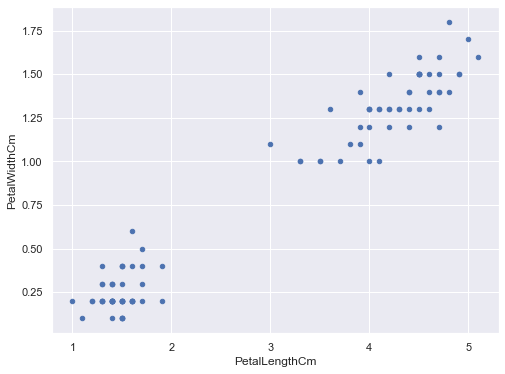

In [578]:
markers = {0: {'marker': '+', 'name': 'setosa'},
           1: {'marker': 'o', 'name': 'versicolor'}}

# Code for plot here ...
fig, ax = plt.subplots(figsize=(8,6))
data.groupby(['Species']).plot.scatter(x='PetalLengthCm', y='PetalWidthCm', ax=ax)

Your plot should look something like this

![](visualization.png).

Don't fuss over the finer points such as axis tick marks or legend position.

## Prepare data for training

### Add bias and convert Pandas dataframes to NumPy matrices. (2 points)

Now prepare data for training. First, add a column for bias (make this the first column in X) and convert the resulting Pandas dataframe to a NumPy matrix.

In [579]:
# Add column for bias
# X =  # Get np.matrix from Pandas DataFrame
X.insert(0, 'Bias', 0)
X = np.matrix(X)
print(X)

[[0.  1.4 0.2]
 [0.  1.4 0.2]
 [0.  1.3 0.2]
 [0.  1.5 0.2]
 [0.  1.4 0.2]
 [0.  1.7 0.4]
 [0.  1.4 0.3]
 [0.  1.5 0.2]
 [0.  1.4 0.2]
 [0.  1.5 0.1]
 [0.  1.5 0.2]
 [0.  1.6 0.2]
 [0.  1.4 0.1]
 [0.  1.1 0.1]
 [0.  1.2 0.2]
 [0.  1.5 0.4]
 [0.  1.3 0.4]
 [0.  1.4 0.3]
 [0.  1.7 0.3]
 [0.  1.5 0.3]
 [0.  1.7 0.2]
 [0.  1.5 0.4]
 [0.  1.  0.2]
 [0.  1.7 0.5]
 [0.  1.9 0.2]
 [0.  1.6 0.2]
 [0.  1.6 0.4]
 [0.  1.5 0.2]
 [0.  1.4 0.2]
 [0.  1.6 0.2]
 [0.  1.6 0.2]
 [0.  1.5 0.4]
 [0.  1.5 0.1]
 [0.  1.4 0.2]
 [0.  1.5 0.1]
 [0.  1.2 0.2]
 [0.  1.3 0.2]
 [0.  1.5 0.1]
 [0.  1.3 0.2]
 [0.  1.5 0.2]
 [0.  1.3 0.3]
 [0.  1.3 0.3]
 [0.  1.3 0.2]
 [0.  1.6 0.6]
 [0.  1.9 0.4]
 [0.  1.4 0.3]
 [0.  1.6 0.2]
 [0.  1.4 0.2]
 [0.  1.5 0.2]
 [0.  1.4 0.2]
 [0.  4.7 1.4]
 [0.  4.5 1.5]
 [0.  4.9 1.5]
 [0.  4.  1.3]
 [0.  4.6 1.5]
 [0.  4.5 1.3]
 [0.  4.7 1.6]
 [0.  3.3 1. ]
 [0.  4.6 1.3]
 [0.  3.9 1.4]
 [0.  3.5 1. ]
 [0.  4.2 1.5]
 [0.  4.  1. ]
 [0.  4.7 1.4]
 [0.  3.6 1.3]
 [0.  4.4 1.4]
 [0.  4.5 

Next, convert Y to a NumPy matrix.

In [580]:
Y = np.matrix(Y)
print(Y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


At this point, X and Y should be of type `np.matrix` and they should have shapes (100, 3) and (100, 1) respectively.

In [581]:
assert isinstance(X, np.matrix)
assert isinstance(Y, np.matrix)
assert X.shape == (100, 3)
assert Y.shape == (100, 1)

## Sigmoid function

### Implement a vectorized sigmoid function (3 points)

The sigmoid function will map all input values to the range (0.0, 1.0) and it is given by
<br />

$\Large{h_\theta(x) = \frac{1}{1 + e^{-x}}}$

In [582]:
# This function should return a vector (ndarray) with the dimension of Z.
# The body of this function should be a single line of code.

def sigmoid(Z):
    """
    Sigmoid function
    Z: an int or a numpy.ndarray
    """

    return (1 / (1 + np.exp(-Z)))


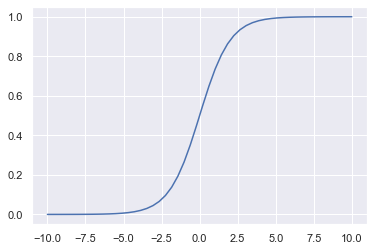

In [583]:
# Here are some assertions to test your sigmoid function.
# If your sigmoid function is correct, these assertions should hold.
assert sigmoid(0) == 0.5, "The sigmoid function is wrong."
assert 1.0001 > sigmoid(100) > 0.9999, "The sigmoid function is wrong."
assert -0.0001 < sigmoid(-100) < 0.0001, "The sigmoid function is wrong."
X_test = np.linspace(-10, 10)
Y_test = sigmoid(X_test)
plt.plot(X_test, Y_test)

Your plot should look something like this
![](sigmoid_plot.png)

## Cost function

### Implement a vectorized cost function (5 points)

The cost function should use the sigmoid function (implemented above) and is given by:
<br />

$\Large{J(\theta) = -\frac{1}{m}\sum_{i=1}^m \Big(y^{(i)} \;\text{log}\big(h_\theta(x^{(i)})\big) + \big(1 - y^{(i)}\big) \;\text{log}\big(1 - h_\theta(x^{(i)})\big)\Big)}$

In [584]:
def calc_log_cost(X, Y, theta_):
    """Calculate logistic regression cost
    You should NOT use loops. This should be vectorized.

    X: numpy.matrix, feature vector
    y: numpy.matrix, target / output vector
    theta_: numpy.ndarray, weight vector
    return: float
    """
    # Complete this function...
    m = -(1 / Y.size)
    M = np.sum(np.multiply(Y, np.log(sigmoid(X * theta_))) + np.multiply((1 - Y), np.log(1 - sigmoid(X * theta_)))) 
    return M * m


If your cost function is correct, your code should pass the following test.

In [585]:
theta_init = np.zeros((X.shape[1], 1))
result = calc_log_cost(X, Y, theta_init)
print(result) # this should be about 0.693
assert round(result, 3) == 0.693
# NOTE: -0.6931... is log(0.5) and with theta all zeros and
# a binary classification, all terms in the initial cost calculation
# will be -0.6931, and we have m of them, and we multiply by -1/m and
# we get exactly -log(0.5)

0.6931471805599453


## Gradient descent

The vectorized equation for gradient descent is given by
<br />

$\Large{\nabla J(\theta) \gets \theta_j - \frac{2}{m}\Big(X^T(h_\theta(X) -Y)\Big)}$

<br />

$\Large{\theta \gets \theta - \eta\nabla J(\theta)}$
<br />

### Write a function to calculate the gradient (3 points)

Write a vectorized function to calculate the gradient, given X, Y and $\theta$ using
<br />
$\Large{\frac{2}{m}\Big(X^T(h_\theta(X) -Y)\Big)}$
<br />
where $m$ is the number of training instances, and $\theta$ are the model parameters.

In [586]:
def calc_gradient(X, Y, theta_):
    """Calculate gradient for gradient descent
    You should not use loops. This should be vectorized.

    X: numpy.matrix, feature vector
    y: numpy.matrix, target / output vector
    theta: numpy.ndarray, weight vector
    return: numpy.matrix
    """
    # Complete this function...

    m = (2 / Y.size)
    M = (X.T * (sigmoid(X * theta_) - Y)) 
    return M * m

### Implement gradient descent (5 points)

This function should take X and Y as parameters, along with the initial $\theta$, the learning rate, $\eta$, and the number of epochs. Here you should use a loop over epochs.

In [587]:
def gradient_descent(X, Y, theta_init, eta, epochs):
    """
    This function returns updated theta and loss over epochs.

    X: numpy.matrix, feature vector
    y: numpy.matrix, target / output vector
    theta: numpy.ndarray, weight vector
    eta: float, learning rate
    epochs: int, number of iterations through training data set
    return: tuple of numpy.ndarray, list[float]
    """

    losses = np.zeros(epochs)  
    theta = np.zeros((epochs, 3, 1))
    for i in range(0, epochs):
        # theta_init = theta_init - eta * (calc_gradient(X, Y, theta_init))
        theta_init = (theta_init - eta * (calc_gradient(X, Y, theta_init)))
        
        losses[i] = calc_log_cost(X, Y, theta_init)
    
    theta = theta_init
    return theta, losses



## Train your model with gradient descent

### Train model (5 points)

You may have to experiment a bit with the learning rate and number of epochs.

In [588]:
eta = 0.01
epochs = 150

# Train the model using gradient descent here...
theta, cost = gradient_descent(X, Y, theta_init, eta, epochs)



In [589]:
print('Theta:', theta)
print('Cost:', cost)

Theta: [[0.        ]
 [0.2412626 ]
 [0.26134116]]
Cost: [0.68222348 0.67247735 0.66377845 0.65600966 0.64906624 0.64285494
 0.63729297 0.63230701 0.62783224 0.62381139 0.62019394 0.61693528
 0.61399604 0.61134147 0.60894088 0.60676712 0.60479619 0.60300682
 0.60138016 0.59989948 0.59854993 0.59731826 0.59619273 0.59516281
 0.59421915 0.59335337 0.59255797 0.59182624 0.59115217 0.59053033
 0.58995589 0.58942446 0.5889321  0.58847528 0.58805079 0.58765573
 0.58728748 0.58694369 0.58662221 0.58632108 0.58603856 0.58577304
 0.58552306 0.58528731 0.58506457 0.58485376 0.58465388 0.58446401
 0.58428333 0.58411107 0.58394655 0.58378914 0.58363825 0.58349335
 0.58335397 0.58321966 0.58309001 0.58296465 0.58284324 0.58272547
 0.58261105 0.58249971 0.58239122 0.58228536 0.58218191 0.58208069
 0.58198153 0.58188427 0.58178876 0.58169487 0.58160247 0.58151146
 0.58142172 0.58133316 0.5812457  0.58115924 0.58107371 0.58098905
 0.58090518 0.58082206 0.58073962 0.58065781 0.58057659 0.58049592
 0.580

Text(0.5, 1.0, 'Cost vs. Training Epoch')

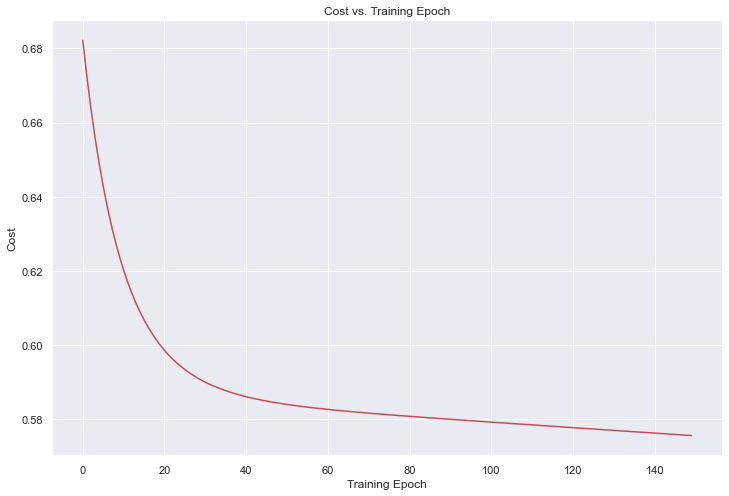

In [590]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epochs), cost, 'r')
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Training Epoch')

In the following Markdown cell, report your value for $\eta$ and the number of epochs. Explain briefly how you arrived at the values for $\eta$ and epochs. Why do you think these are good values? Justify your choices.

eta = 0.0001, epochs = 15 -> the curve is too linear. <br>
eta = 0.0001, epochs = 50 -> the curve is too linear (no change from previous analysis). <br>
eta = 0.01, epochs = 15 -> the curve is beginning to look better, but still not great yet.  <br>
eta = 0.01, epochs = 1500 -> the curve has some strange behavior. It drops significantly, then is relativly linear for the rest of the curve. <br>

Good values for this is eta = 0.01 and epochs = 100. This results in a nice curve.  


At this point, you should have an optimal $\theta$.
<br />

## Making predictions and plotting the decision boundary

### Implement a function to calculate the probability of a given prediction (3 points)

Hint: Use vectorized dot product and the `sigmoid` function you implemented earlier.

In [591]:
def predict_probability(X, theta):
    """ We need to know the probability of a certain test sample
    falling in a certain class. For this we need a function which
    gives the probability. This function returns a numpy.matrix
    of probabilities, given observations, X, and weights, theta
    """
    # Complete this function...
    return sigmoid(np.dot(X, theta))


### Make a prediction (3 points)

Suppose, we have a sample with petal length 2.0 and petal width 0.3. Using the `predict_probability` function, find the probability of this sample being _Iris setosa_.

In [592]:
bias = 1.0
petal_length = 2.0
petal_width = 0.3

# Complete code to make prediction here and print out the result, including the 
predict_probability(X, theta)
# print(predictions)


matrix([[0.59629134],
        [0.59629134],
        [0.59047023],
        [0.60208546],
        [0.59629134],
        [0.62590361],
        [0.6025664 ],
        [0.60208546],
        [0.59629134],
        [0.5958079 ],
        [0.60208546],
        [0.60785112],
        [0.58998461],
        [0.57236894],
        [0.58462366],
        [0.61453853],
        [0.60304714],
        [0.6025664 ],
        [0.6197645 ],
        [0.60832962],
        [0.61358684],
        [0.61453853],
        [0.57286032],
        [0.63200245],
        [0.62496286],
        [0.60785112],
        [0.62023755],
        [0.60208546],
        [0.59629134],
        [0.60785112],
        [0.60785112],
        [0.61453853],
        [0.5958079 ],
        [0.59629134],
        [0.5958079 ],
        [0.58462366],
        [0.59047023],
        [0.5958079 ],
        [0.59047023],
        [0.60208546],
        [0.59677459],
        [0.59677459],
        [0.59047023],
        [0.63246931],
        [0.63713147],
        [0

## Plot the decision boundary

### Write a function to calculate the boundary (3 points)

In [607]:
def decision_y(x, theta):
    # Complete this function
    pred = predict_probability(x, theta)
    print(pred.sum())

    return pred.sum() 
    




### Plot the decision boundary with respect to the data (5 points)

The plot shoud include the petal length on the abscissa and petal width on the ordinate. As with the earlier plot (above) use the + symbol for _Iris setosa_, and circle for _Iris versicolor_. The decision boundary should clearly separate these classes using the optimal $\theta$ that you found above. This boundary is the line where $p = 0.5$.

1.6249907254507479
1.746118757981319
1.8599871926084868
1.9640156345168185
2.0566073279216415
[1.6249907254507479, 1.746118757981319, 1.8599871926084868, 1.9640156345168185, 2.0566073279216415]
[1.6249907254507479, 0.8730593789906596, 0.6199957308694956, 0.4910039086292046, 0.4113214655843283]


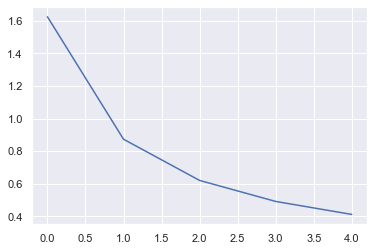

In [619]:
line_xs = [1, 2, 3, 4, 5]
line_ys = [decision_y(x, theta) for x in line_xs]

markers = {0: {'marker': '+',
               'name': 'setosa'},
           1: {'marker': 'o',
               'name': 'versicolor'}}

# Complete code for plot here...
print(line_ys)
points = []
for i in range(0,5):
    points.append(line_ys[i] / line_xs[i])

print(points)
plt.plot(points)
plt.show()
